based on https://towardsdatascience.com/python-scikit-learn-logistic-regression-classification-eb9c8de8938d

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
train = pd.read_csv("./train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# look at missing values
train[pd.isnull(train).any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [4]:
# can push training and test set through the same
def preproc(df):
    # fill age with mean for now 😳
    df.Age.fillna(df.Age.mean(), inplace=True)
    
    # change ports to binary cols
    ports = pd.get_dummies(df.Embarked, prefix='Embarked')
    df = df.join(ports)
    df.drop(['Embarked'], axis=1, inplace=True)
    
    # drop cols with no obvious relationship
    df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
    
    # make sex binary
    df.Sex = df.Sex.map({'male': 0, 'female': 1}) # TODO - test without this - diff result?
    
    return df

def x_y_split(df, split_col='Survived'):
    if split_col in df.columns:
        y = df[split_col].copy()
        X = df.drop([split_col], axis=1)
        return X, y
    return df, None

In [5]:
X_train, y_train = x_y_split(preproc(train))

# get test data
test = pd.read_csv("./test.csv")
X_test, y_test = x_y_split(preproc(test))

# if we needed to split...
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
model = LogisticRegression(max_iter=1000, random_state=0) # can specify solver e.g. solver='lbfgs', olver='liblinear', C=10.0 
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

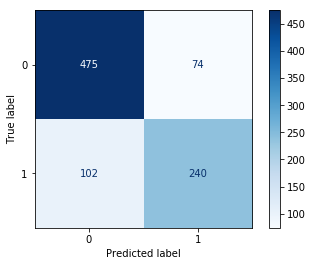

In [7]:
## assess against training data initially
plot_confusion_matrix(model, X_train, y_train, cmap='Blues')

In [8]:
# assess against training data cont...
y_train_pred = pd.Series(model.predict(X_train))
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [9]:
# ** CAN'T assess against test data as there are no labels **
#y_pred = pd.Series(model.predict(X_test))
#print(classification_report(y_test, y_pred))